In [32]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/H-B-P/d-and-d-sci-apr/main/dset.csv"
df = pd.read_csv(url)
df.columns = ['damage','direction','encounter','month']

A solution to the April 2021 edition of D&D.Sci  
(https://www.lesswrong.com/posts/S3LKfRtYxhjXyWHgN/d-and-d-sci-april-2021-voyages-of-the-gray-swan)

In [38]:
print(df)

       damage   direction        encounter    month
0        35.0  southbound     crabmonsters   1/1396
1        49.0  southbound           kraken   1/1396
2        52.0  northbound          pirates   1/1396
3        18.0  southbound          pirates   1/1396
4        51.0  northbound        merpeople   1/1396
...       ...         ...              ...      ...
21790    17.0  northbound          pirates  12/1405
21791    77.0  northbound  water elemental  12/1405
21792    47.0  southbound          pirates  12/1405
21793    17.0  northbound          pirates  12/1405
21794    79.0  northbound  water elemental  12/1405

[21795 rows x 4 columns]


In [35]:
df['damage'] = df['damage'].str.rstrip("%+").astype(float)

In [10]:
enc = df[['encounter']]
enc.value_counts(normalize=True)

encounter      
pirates            0.252627
sharks             0.154806
merpeople          0.122872
unknown            0.108603
kraken             0.091994
water elemental    0.090801
harpy              0.071438
crabmonsters       0.047763
nessie             0.043909
demon whale        0.015187
dtype: float64

Now, I plot a bar graph of frequencies of damage for all encounters, and estimate how big the tail extending past 100% is.

In [40]:
pir = df[df.encounter == 'pirates']

       damage   direction encounter    month
2        52.0  northbound   pirates   1/1396
3        18.0  southbound   pirates   1/1396
6        57.0  southbound   pirates   1/1396
10       18.0  southbound   pirates   1/1396
11       16.0  southbound   pirates   1/1396
...       ...         ...       ...      ...
21780    47.0  northbound   pirates  12/1405
21782    10.0  southbound   pirates  12/1405
21790    17.0  northbound   pirates  12/1405
21792    47.0  southbound   pirates  12/1405
21793    17.0  northbound   pirates  12/1405

[5506 rows x 4 columns]


<AxesSubplot:ylabel='Frequency'>

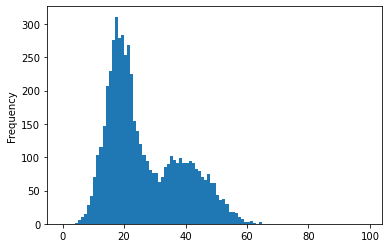

In [45]:
pir['damage'].plot.hist(bins=range(100))

Pirates can be ignored (although there are clearly two varieties of pirate not distinguished in the records)

<AxesSubplot:ylabel='Frequency'>

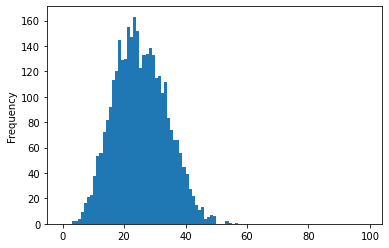

In [46]:
sha = df[df.encounter == 'sharks']
sha['damage'].plot.hist(bins=range(100))

Sharks can be ignored. Indeed, given that we always get precisely one encounter, shark repellent is actively bad

<AxesSubplot:ylabel='Frequency'>

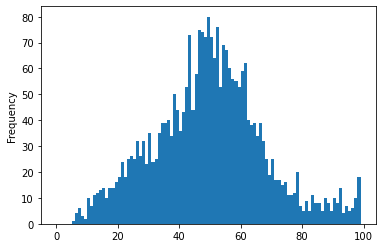

In [47]:
mer = df[df.encounter == 'merpeople']
mer['damage'].plot.hist(bins=range(100))

Merpeople are a problem; only method of dealing with them is merfolk repellent for 45g. Merfolk are less of a problem if the visible distribution is vaguely normalish, with weird noise/effects making it a bit jumbly, but much more of a problem if there are (like pirates) two types of merfolk, one of which actualls kills us a lot.

<AxesSubplot:ylabel='Frequency'>

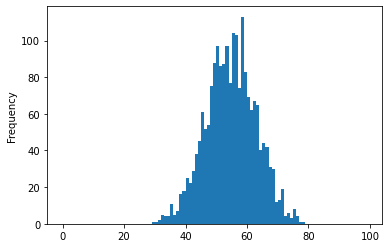

In [48]:
kra = df[df.encounter == 'kraken']
kra['damage'].plot.hist(bins=range(100))

Kraken don't seem to kill ships too.

<AxesSubplot:ylabel='Frequency'>

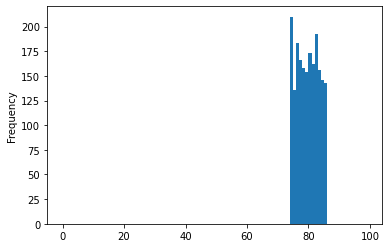

In [49]:
wat = df[df.encounter == 'water elemental']
wat['damage'].plot.hist(bins=range(100))

Water elementals deal ~80 damage; not enough to kill the ship, so by the 1 encounter per journey rule, they are good. However, with 15g spare, giant foam swords would reduce expected damage signifcantly.

<AxesSubplot:ylabel='Frequency'>

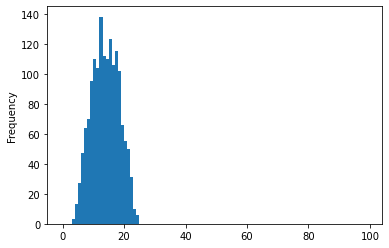

In [50]:
har = df[df.encounter == 'harpy']
har['damage'].plot.hist(bins=range(100))

Harpies are trivial.

<AxesSubplot:ylabel='Frequency'>

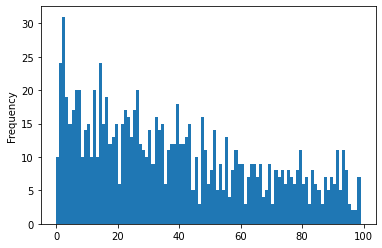

In [52]:
cra = df[df.encounter == 'crabmonsters']
cra['damage'].plot.hist(bins=range(100))

Again, this distribution actually reaches 100 damage, and has the potential for a very long tail; anti-crab gear only costs 20g, and seems very effective.

<AxesSubplot:ylabel='Frequency'>

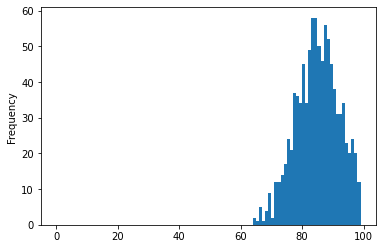

In [54]:
nes = df[df.encounter == 'nessie']
nes['damage'].plot.hist(bins=range(100))

Looks valuely normal, with mean ~85 and std. dev 7; this would indicate about 2.5% of nessie attacks sink a ship. Could improve average damage taken with a cannon (which also hits pirates).

<AxesSubplot:ylabel='Frequency'>

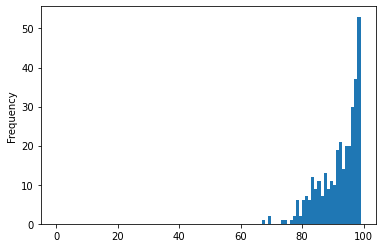

In [56]:
wal = df[df.encounter == 'demon whale']
wal['damage'].plot.hist(bins=range(100))

Oh dear. These are terrifying. I need to estimate what amount of the ~10% of sunk ships encounter which things. I have <1% Nessie and Merfolk, and <2% Crab, so >6% (and probably more) are Demon Whales, which are the things that actually sink most ships that sink.

I buy all of the oars to outrun demon whales, spending 20g this way.

Now, since I don't want to do more detailed data analysis (eyeballing graphs will do), I now have a decision to make: will Merfolk repellant help - they reduce the probabilty of a Merfolk encounter to 0, but raise the probability of having another encounter (i.e. demon whales).

I declare Merfolk repellant "probably worth it", and spend 45g on that, along with 20g more on anti-crab swords.

With the remaining 15g, I buy 1 cannon to increase odds of survival on finding a Nessie. Done